Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

In [1]:
import sklearn
from packaging import version
assert version.parse(sklearn.__version__) <= version.parse('1.2')

In [2]:
import mglearn
import matplotlib.pyplot as plt

In [3]:
import sys

In [4]:
sys.path

['c:\\Notes\\Introduction-to-Machine-Learning-with-Python\\Codes',
 'c:\\Users\\19243\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip',
 'c:\\Users\\19243\\AppData\\Local\\Programs\\Python\\Python311\\DLLs',
 'c:\\Users\\19243\\AppData\\Local\\Programs\\Python\\Python311\\Lib',
 'c:\\Users\\19243\\AppData\\Local\\Programs\\Python\\Python311',
 '',
 'C:\\Users\\19243\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'C:\\Users\\19243\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32',
 'C:\\Users\\19243\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib',
 'C:\\Users\\19243\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin',
 'c:\\Users\\19243\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages']

In [5]:
import mglearn

# 监督学习

## 分类与回归

## 监督学习算法

### 一些样本数据集

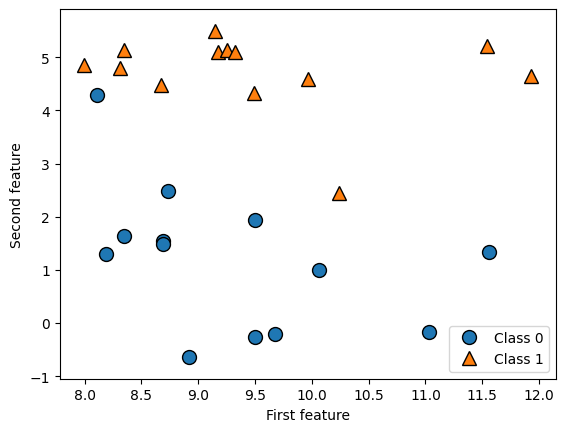

In [6]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.show()

In [7]:
print('X.shape: {}'.format(X.shape))

X.shape: (26, 2)


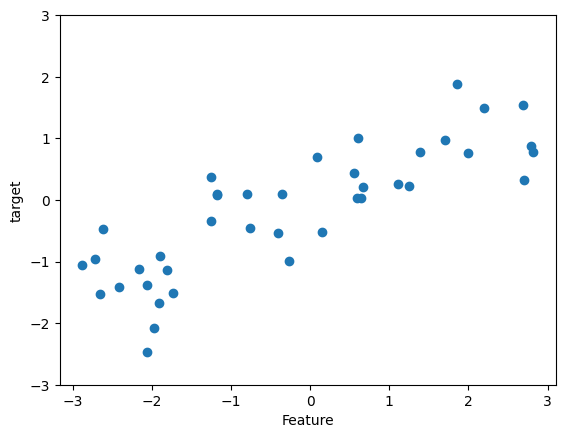

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('target')
plt.show()

In [9]:
print('X.shape: {}'.format(X.shape))

X.shape: (40, 1)


In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
import numpy as np

In [12]:
print('Shape of cancer data: {}'.format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [13]:
print('Sample counts per class : \n{}'.format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class : 
{'malignant': 212, 'benign': 357}


In [14]:
print('Feature names: \n{}'.format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape: {}'.format(boston.data.shape))

Data shape: (506, 13)


c:\Users\19243\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [16]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

X.shape: (506, 104)


### k近邻

#### k近邻分类

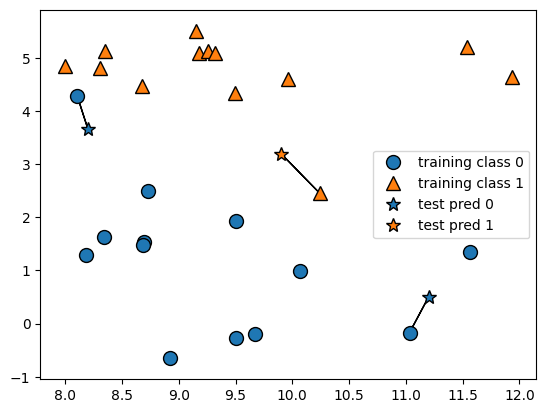

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

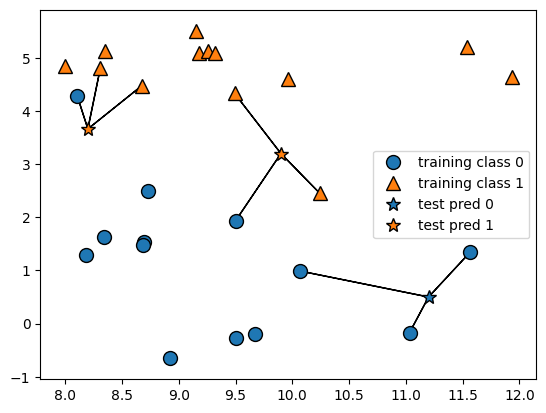

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 1 1 1 0 1 0]


In [21]:
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


#### 分析KNeighborsClassifier

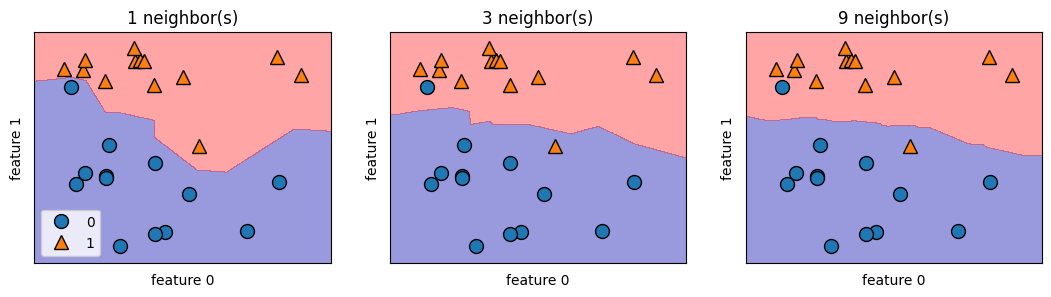

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(13, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)
plt.show()

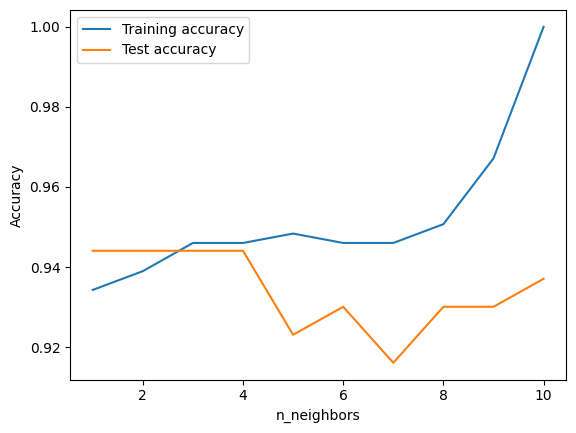

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=42)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
   
neighbors_settings = list(neighbors_settings)
training_accuracy.reverse()
test_accuracy.reverse() 
plt.plot(neighbors_settings, training_accuracy, label='Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### k近邻回归

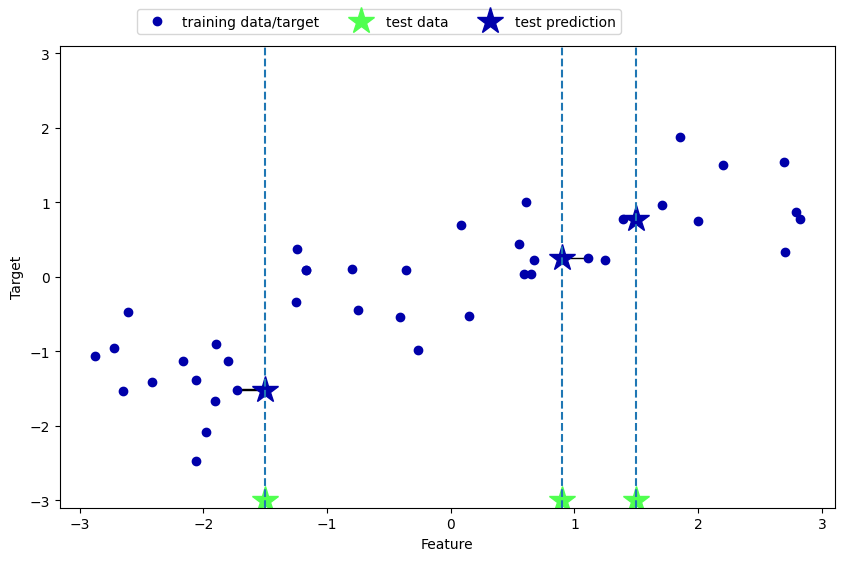

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

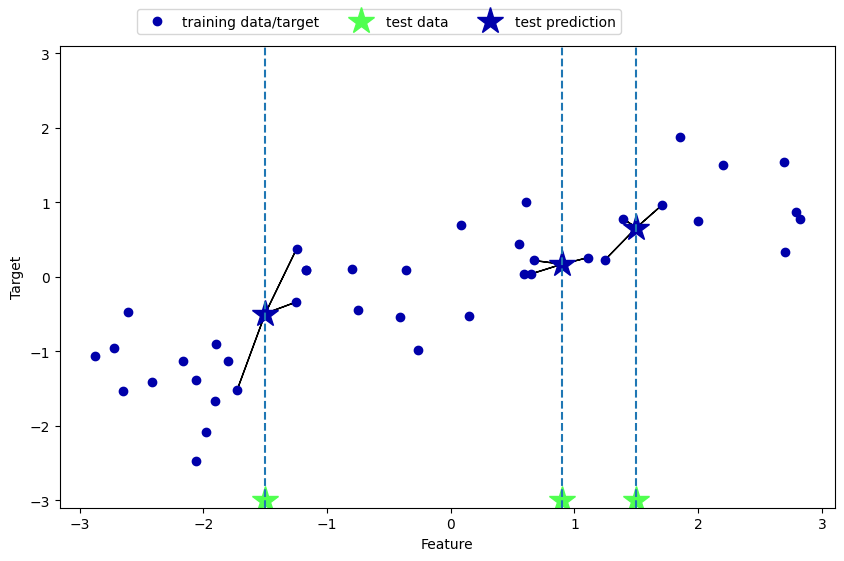

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [27]:
print('Test set predictions: \n{}'.format(reg.predict(X_test)))

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [28]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### 分析KNeighborsRegressor

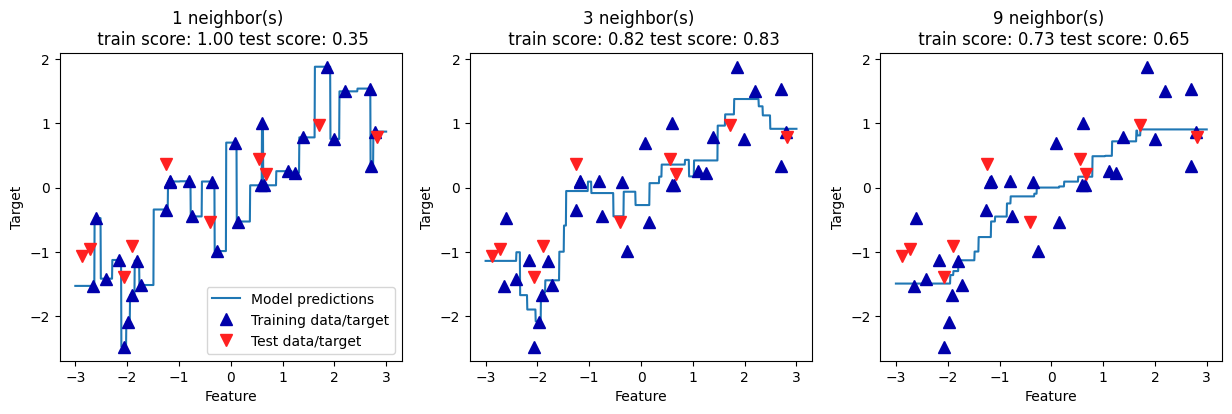

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s) \n train score: {:.2f} test score: {:.2f}".format(n_neighbors, 
                                                                                   reg.score(X_train, y_train), 
                                                                                   reg.score(X_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc='best')
plt.show()

### 线性模型

#### 用于回归的线性模型

w[0]: 0.393906  b: -0.031804


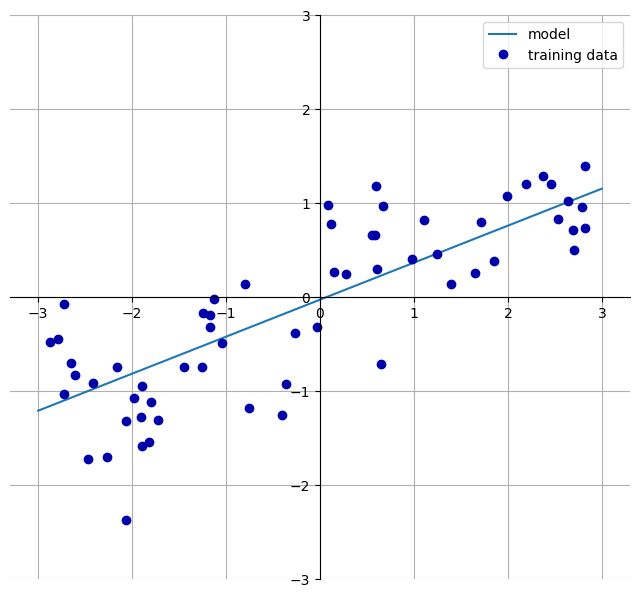

In [30]:
mglearn.plots.plot_linear_regression_wave()

#### 线性回归（又名普通最小二乘法）

In [31]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [33]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.67
Training set score: 0.66


In [34]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

c:\Users\19243\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [35]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(lr.score(X_test, y_test)))
# Training set score: 0.95
# Training set score: 0.61

Training set score: 0.95
Training set score: 0.61


#### 岭回归

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(ridge.score(X_test, y_test)))
# Training set score: 0.89
# Training set score: 0.75

Training set score: 0.89
Training set score: 0.75


In [37]:
from sklearn.linear_model import Ridge
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(ridge10.score(X_test, y_test)))
# Training set score: 0.79
# Training set score: 0.64

Training set score: 0.79
Training set score: 0.64


In [38]:
from sklearn.linear_model import Ridge
ridge01 = Ridge(alpha=.1).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(ridge01.score(X_test, y_test)))
# Training set score: 0.93
# Training set score: 0.77

Training set score: 0.93
Training set score: 0.77


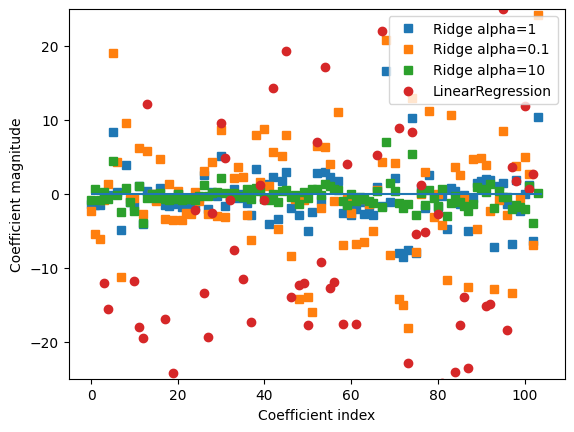

In [39]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 's', label='Ridge alpha=0.1')
plt.plot(ridge10.coef_, 's', label='Ridge alpha=10')
plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

c:\Users\19243\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

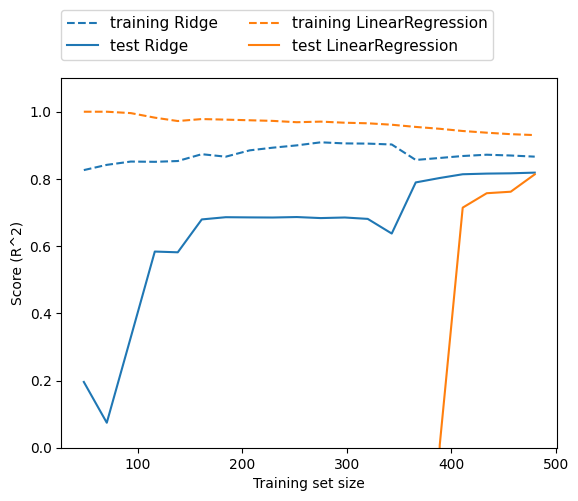

In [40]:
mglearn.plots.plot_ridge_n_samples()

#### lasso

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))
# Training set score: 0.29
# Training set score: 0.21
# Number of features used: 4

Training set score: 0.29
Training set score: 0.21
Number of features used: 4


In [42]:
lasso001 = Lasso(alpha=.01, max_iter=100_000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_ != 0)))
# Training set score: 0.90
# Training set score: 0.77
# Number of features used: 33

Training set score: 0.90
Training set score: 0.77
Number of features used: 33


In [43]:
lasso00001 = Lasso(alpha=.0001, max_iter=100_000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso00001.coef_ != 0)))
# Training set score: 0.95
# Training set score: 0.64
# Number of features used: 96

Training set score: 0.95
Training set score: 0.64
Number of features used: 96


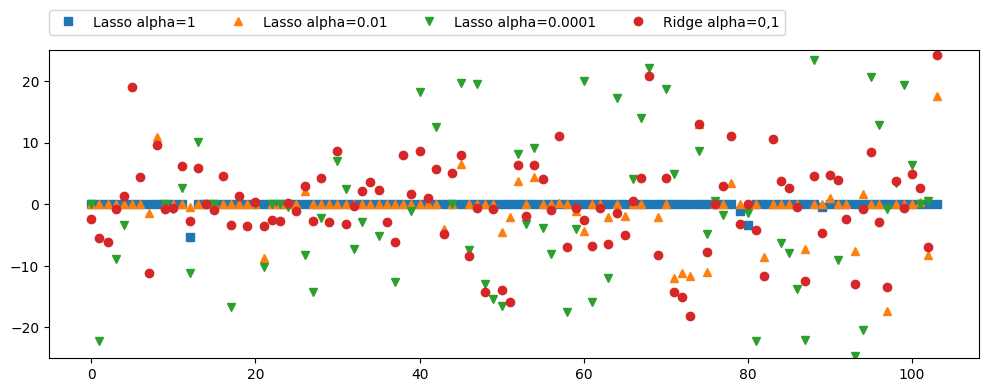

In [44]:
fig = plt.figure(figsize=(12, 4))
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0,1')
plt.legend(ncol=4, loc=(0, 1.05)) # loc的参考位置应该是原点，采用的相对坐标（百分比位置）
plt.ylim(-25, 25)
plt.show()

#### 额外的代码-弹性网络（ElasticNet）

In [45]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=.1, l1_ratio=.001, max_iter=100_000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(elastic_net.score(X_train, y_train)))
print('Training set score: {:.2f}'.format(elastic_net.score(X_test, y_test)))

Training set score: 0.70
Training set score: 0.52


#### 用于分类的线性模型

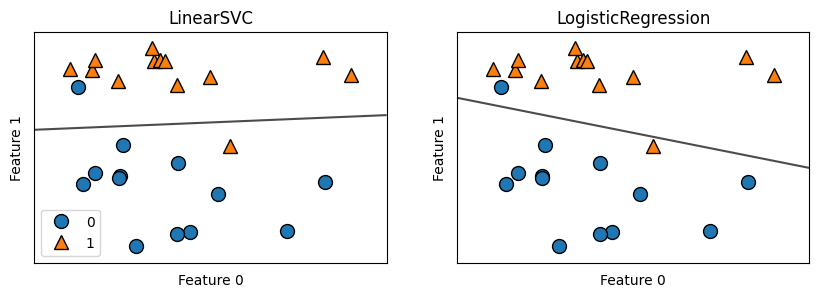

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(max_iter=4000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_title('{}'.format(model.__class__.__name__))
axes[0].legend()
plt.show()

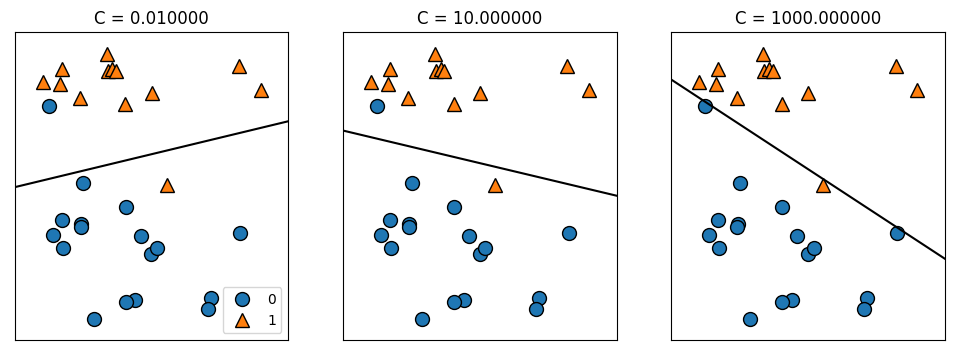

In [47]:
mglearn.plots.plot_linear_svc_regularization()

In [48]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)
# ConvergenceWarning
logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))
# Training set score: 0.946
# Test set score: 0.965

Training set score: 0.946
Test set score: 0.965


c:\Users\19243\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# ConvergenceWarning
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg100.score(X_test, y_test)))
# Training set score: 0.944
# Test set score: 0.958

Training set score: 0.944
Test set score: 0.958


c:\Users\19243\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# ConvergenceWarning
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg001.score(X_test, y_test)))
# Training set score: 0.934
# Test set score: 0.930

Training set score: 0.934
Test set score: 0.930


c:\Users\19243\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


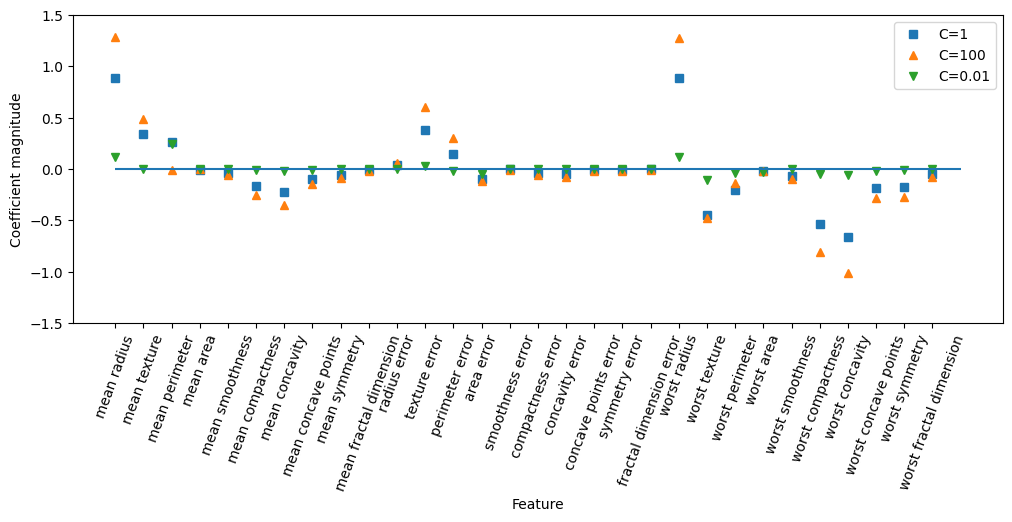

In [51]:
fig = plt.figure(figsize=(12, 4))
plt.plot(logreg.coef_.T, 's', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=70)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

Training accuracy of l1 logreg with C=0.001: 	0.91
Test accuracy of l1 logreg with C=0.001: 	0.92
Training accuracy of l1 logreg with C=1.000: 	0.96
Test accuracy of l1 logreg with C=1.000: 	0.96


c:\Users\19243\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\19243\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training accuracy of l1 logreg with C=10.000: 	0.98
Test accuracy of l1 logreg with C=10.000: 	0.97


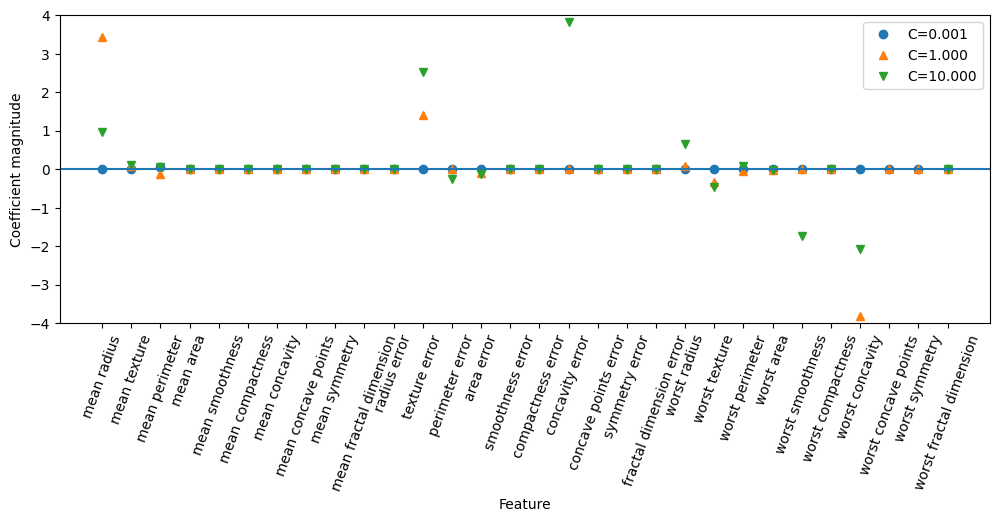

In [52]:
fig = plt.figure(figsize=(12, 4))
for C, marker in zip([.001, 1, 10], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1', solver='liblinear').fit(X_train, y_train)
    print('Training accuracy of l1 logreg with C={:.3f}: \t{:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('Test accuracy of l1 logreg with C={:.3f}: \t{:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=70)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-4, 4)
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.legend()
plt.show()

#### 用于多分类的线性模型

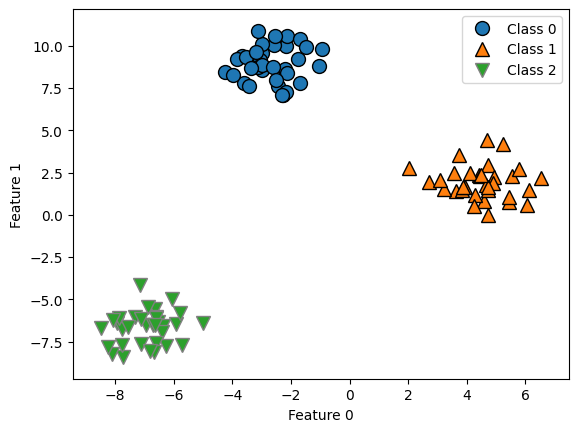

In [53]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.show()

In [54]:
linear_svm = LinearSVC().fit(X, y)
print('Coefficient shape: ', linear_svm.coef_.shape)
print('Intercept shape: ', linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


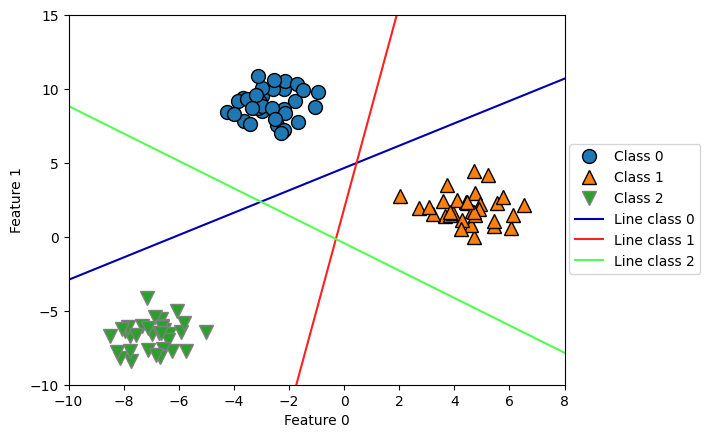

In [55]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, .3))
plt.show()

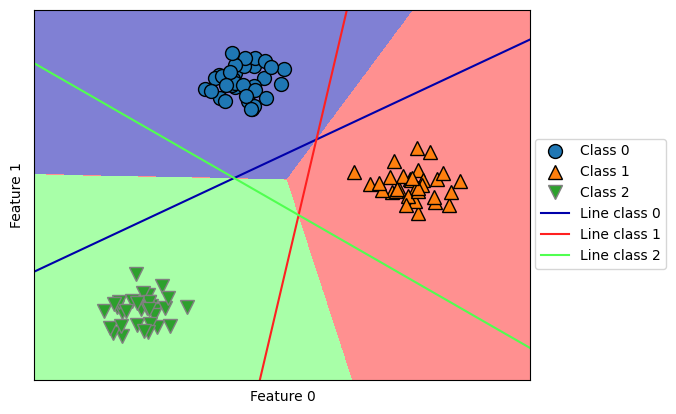

In [56]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, .3))
plt.show()

In [57]:
logreg = LinearRegression().fit(X_train, y_train)
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

c:\Users\19243\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 朴素贝叶斯分类器

In [58]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print('Feature counts:\n', counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### 决策树

In [59]:
import sys
sys.path

['c:\\Notes\\Introduction-to-Machine-Learning-with-Python\\Codes',
 'c:\\Users\\19243\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip',
 'c:\\Users\\19243\\AppData\\Local\\Programs\\Python\\Python311\\DLLs',
 'c:\\Users\\19243\\AppData\\Local\\Programs\\Python\\Python311\\Lib',
 'c:\\Users\\19243\\AppData\\Local\\Programs\\Python\\Python311',
 '',
 'C:\\Users\\19243\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'C:\\Users\\19243\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32',
 'C:\\Users\\19243\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib',
 'C:\\Users\\19243\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin',
 'c:\\Users\\19243\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages']

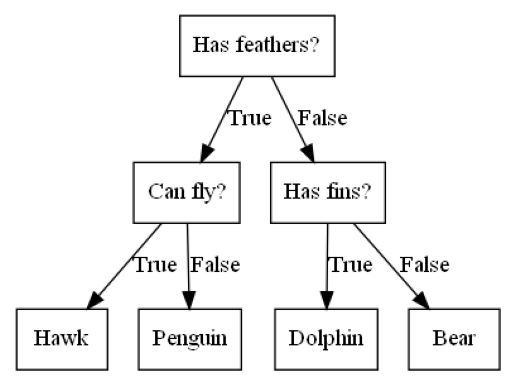

In [60]:
mglearn.plots.plot_animal_tree()

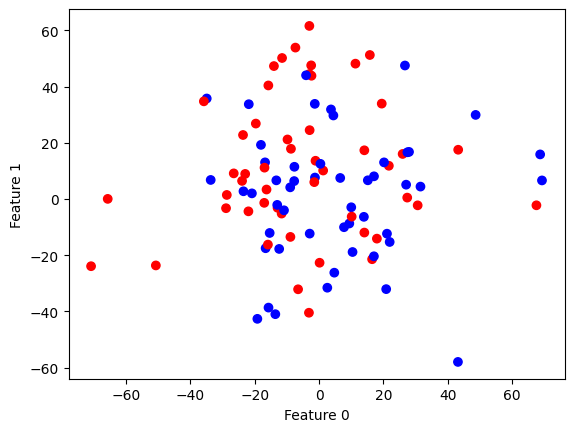

In [61]:
# mglearn.plot2.plot_tree_progressive
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=25, random_state=3)
plt.figure()
ax = plt.gca()
plt.scatter(X[:,0], X[:,1], color=['red' if value == 1  else 'blue' for value in y ])
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
plt.show()

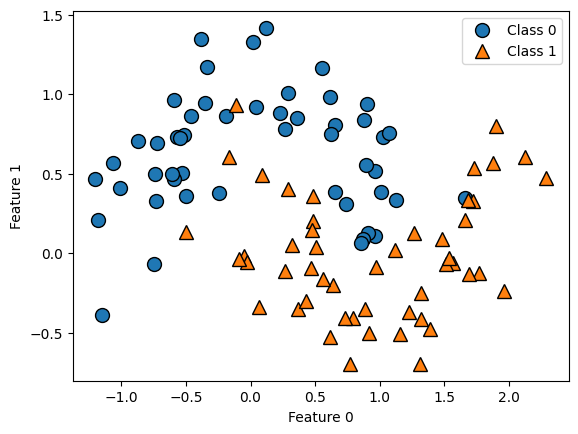

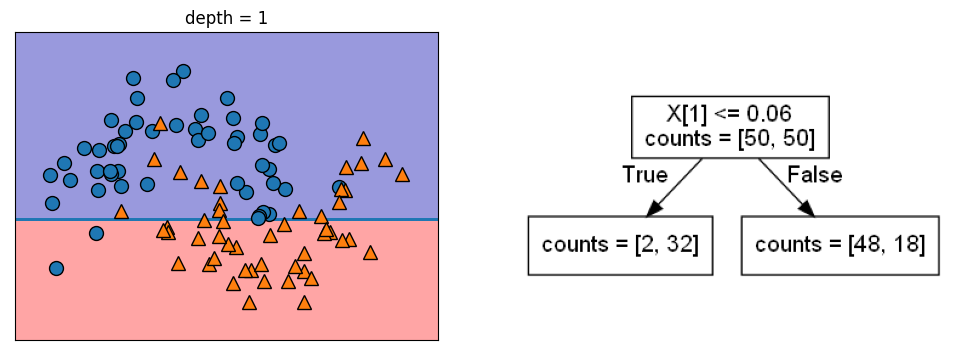

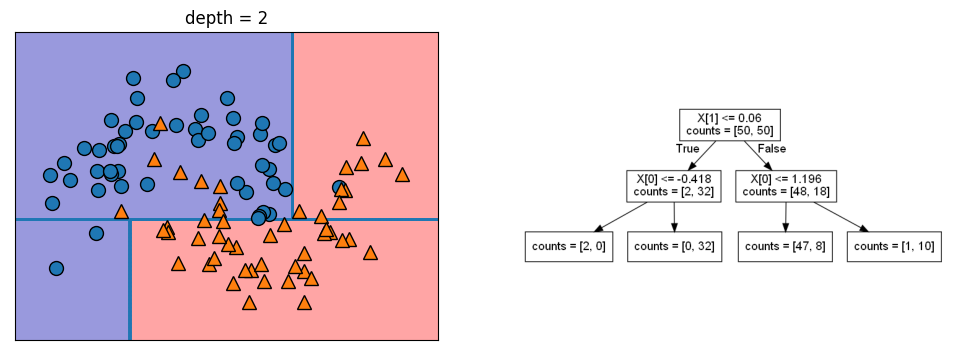

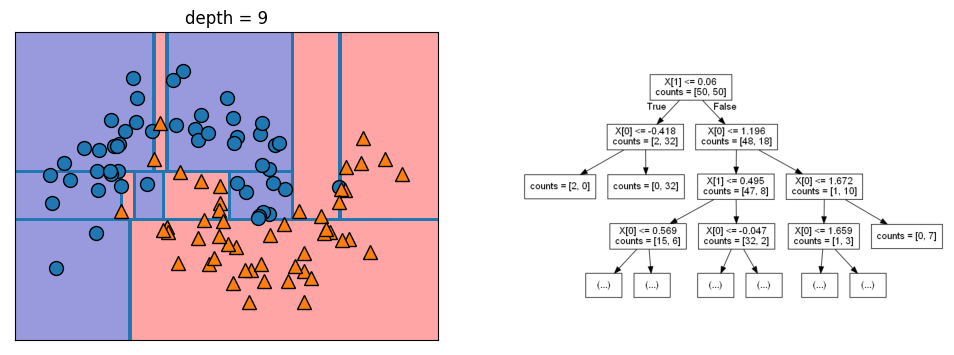

In [62]:
mglearn.plots.plot_tree_progressive()

#### 控制决策树的复杂度

In [63]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [64]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### 分析决策树

In [65]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=cancer.target_names, 
                feature_names=cancer.feature_names, impurity=False, filled=True)

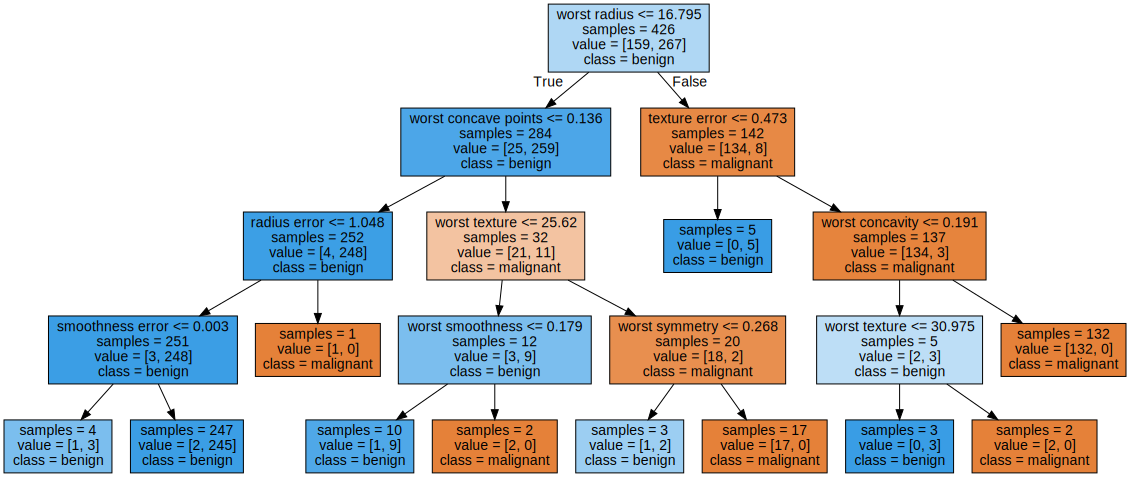

In [66]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

#### 树的特征重要性

In [67]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


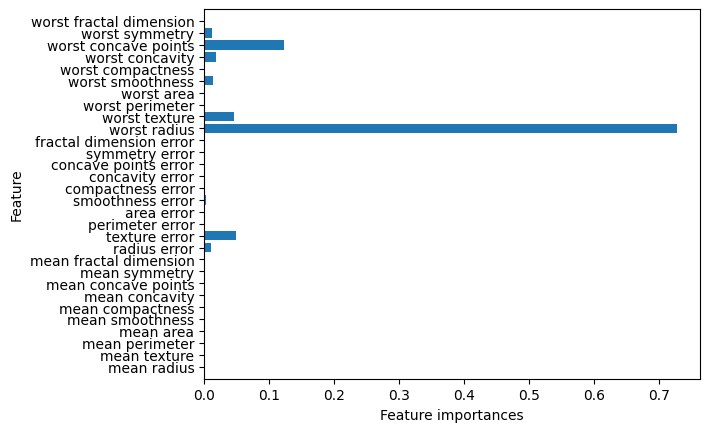

In [68]:
def plot_feature_importances_cancer(model,dataSet):
    n_features = len(model.feature_importances_)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataSet.feature_names)
    plt.xlabel('Feature importances')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree, cancer)

Feature importances: [0. 1.]


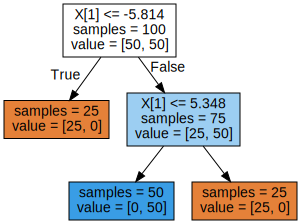

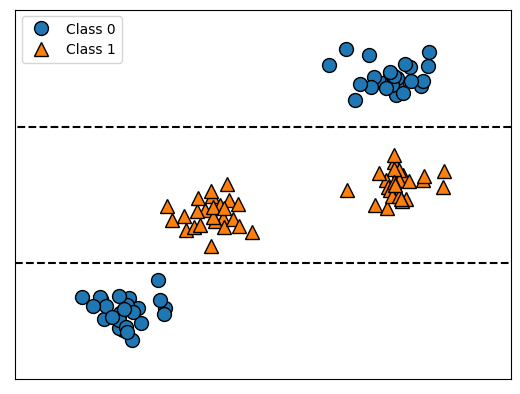

In [79]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

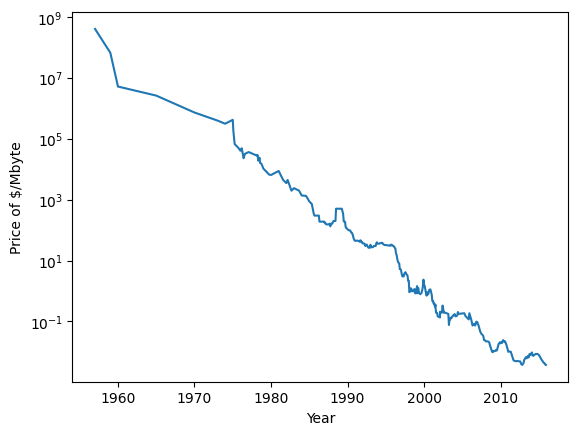

In [69]:
import os
import pandas as pd
ram_prices = pd.read_csv('Data/ram_price.csv', index_col=0)
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price of $/Mbyte')
plt.show()

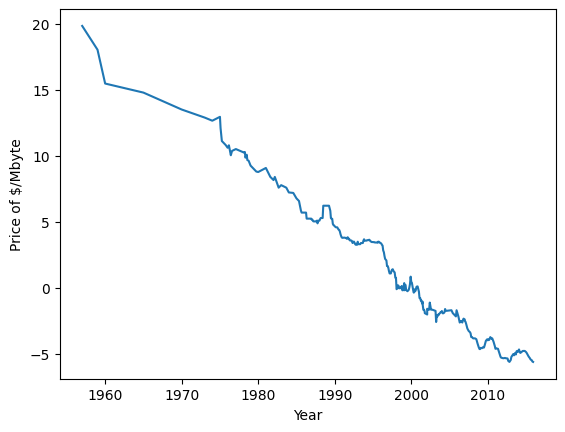

In [70]:
plt.plot(ram_prices.date, np.log(ram_prices.price))
plt.xlabel('Year')
plt.ylabel('Price of $/Mbyte')
plt.show()

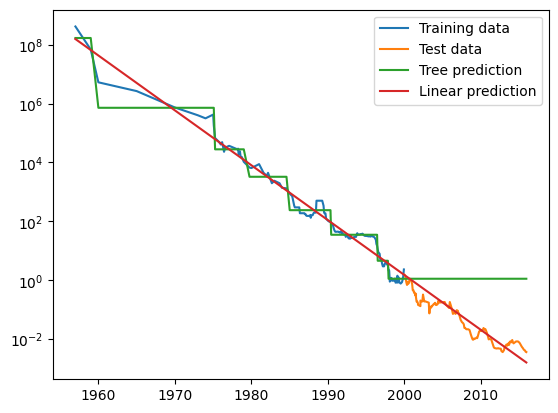

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# np.asarray(data_train.date).reshape(-1, 1)
X_train = data_train.date.values.reshape(-1, 1)
# X_train = data_train.date[:, np.newaxis]
# FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated

y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.values.reshape(-1, 1)

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='Linear prediction')
plt.legend()
plt.show()

### 决策树继承

#### 随机森林

#### 构造随机森林

#### 分析随机森林

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=.25, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

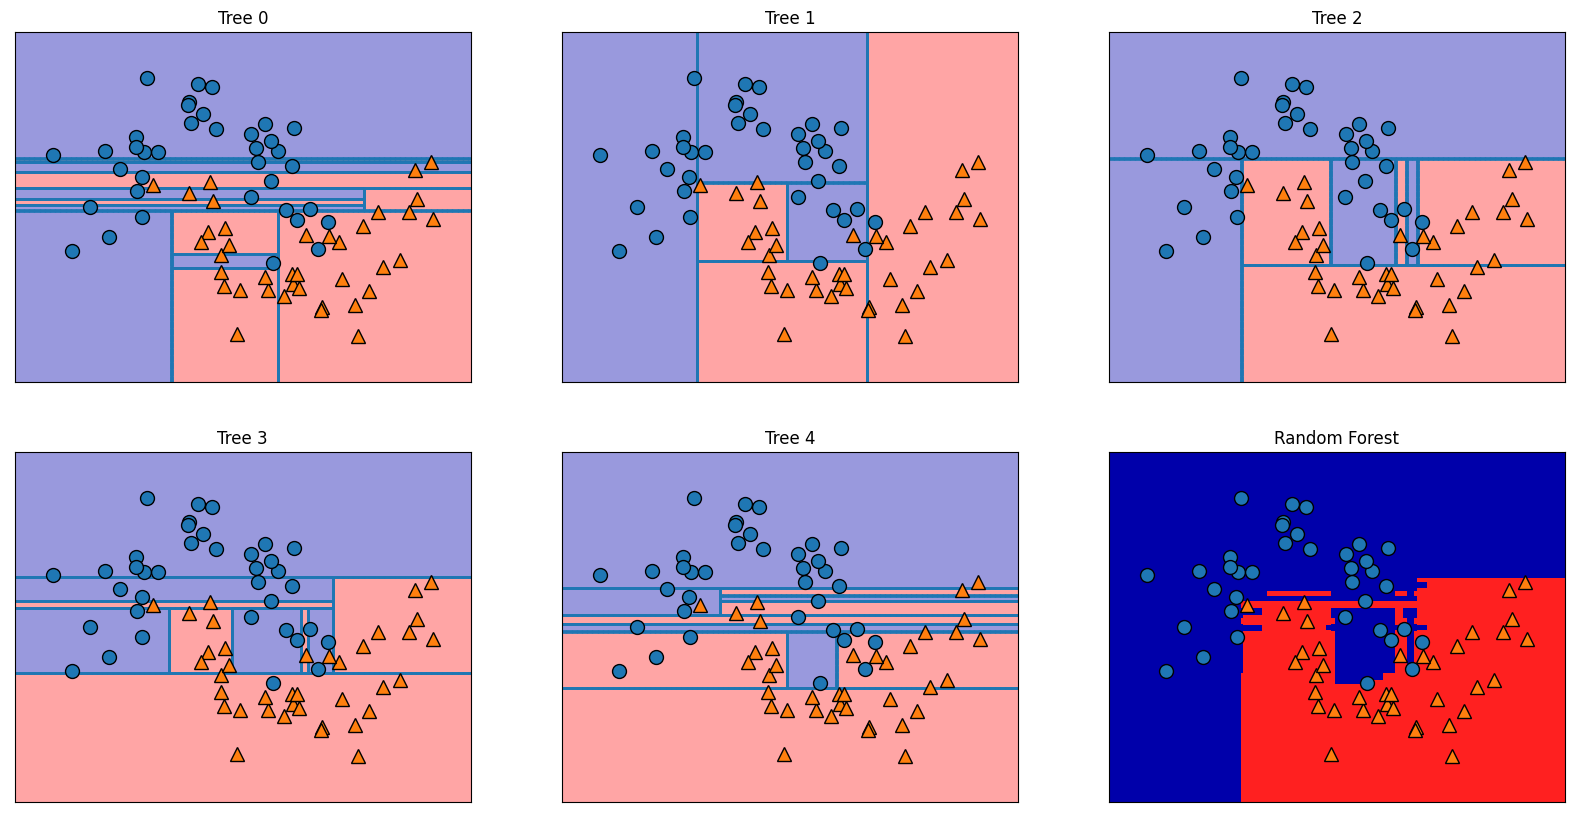

In [89]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1])
axes[-1, -1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print('Accuracy on training set {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set 1.000
Accuracy on test set 0.972


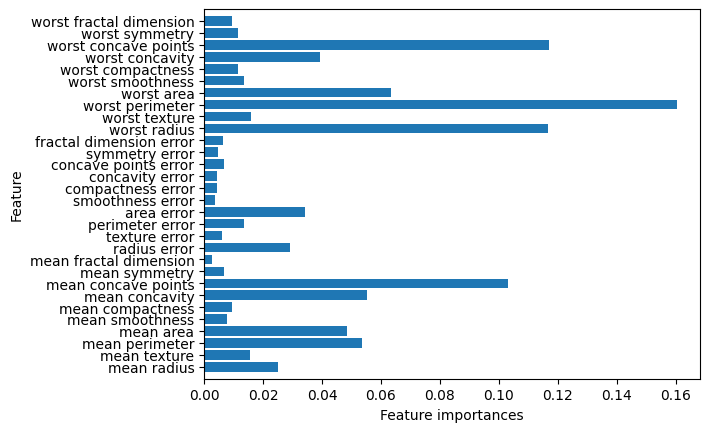

In [98]:
plot_feature_importances_cancer(forest, cancer)

#### 梯度提升回归树（梯度提升机

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('Accuracy on training set {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set 1.000
Accuracy on test set 0.965


In [107]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('Accuracy on training set {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set 0.991
Accuracy on test set 0.972


In [108]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=.01)
gbrt.fit(X_train, y_train)

print('Accuracy on training set {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Accuracy on test set {:.3f}'.format(gbrt.score(X_test, y_test)))

Accuracy on training set 0.988
Accuracy on test set 0.958


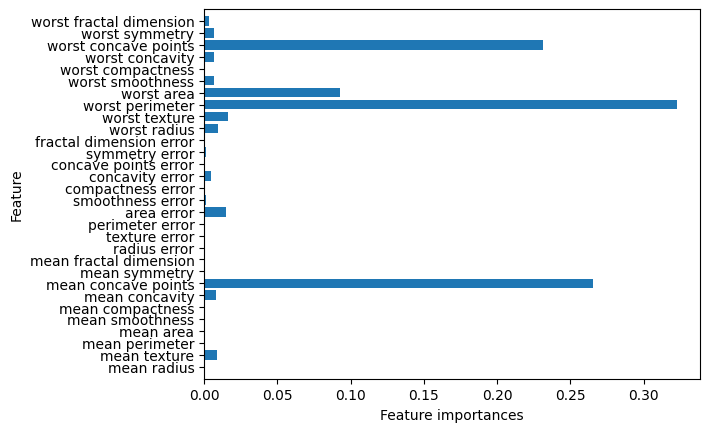

In [113]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt, cancer)

### 核支持向量机

#### 线性模型与非线性特征

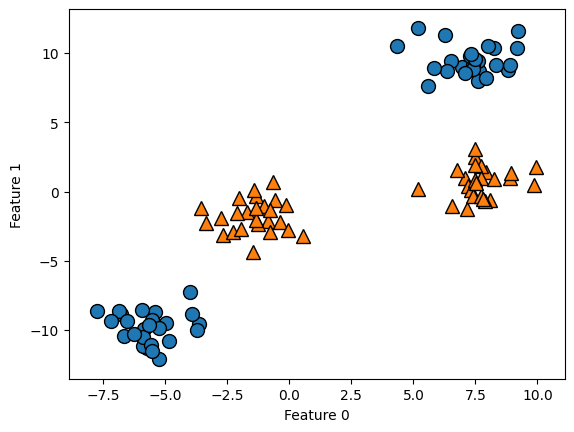

In [121]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

c:\Users\19243\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


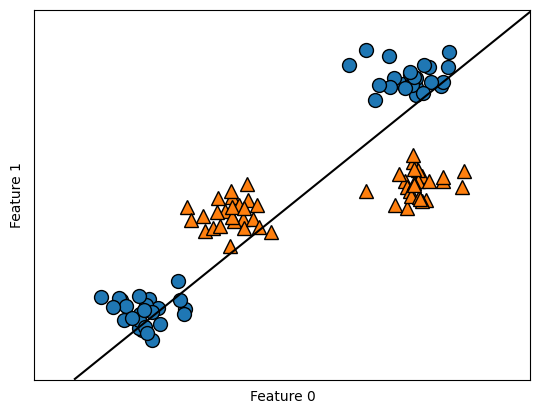

In [125]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

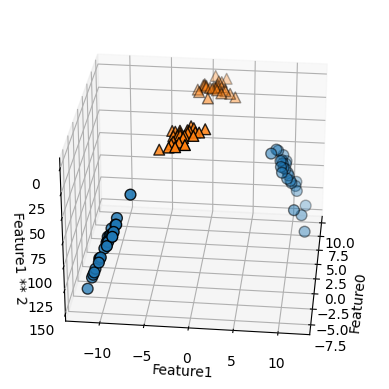

In [176]:
X_new = np.hstack([X, X[:, 1:] ** 2])
# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, axes3d
fig = plt.figure()

ax = fig.add_subplot(projection='3d', elev=-152, azim=-6)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],  s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], marker='^', s=60, edgecolor='k')
ax.set_xlabel('Feature0')
ax.set_ylabel('Feature1', labelpad=0)
ax.set_zlabel('Feature1 ** 2', labelpad=0)
plt.show()

c:\Users\19243\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


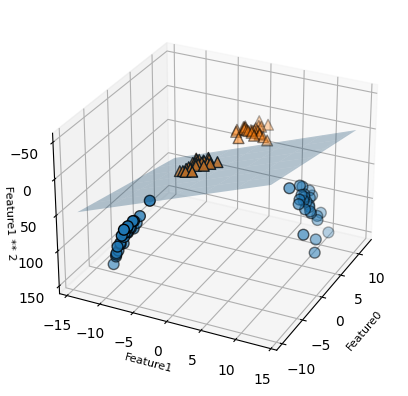

In [209]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

fig = plt.figure()

ax = fig.add_subplot(projection='3d', elev=-152, azim=-26)

xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],  s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], marker='^', s=60, edgecolor='k')
ax.set_xlabel('Feature0', size=8)
ax.set_ylabel('Feature1', labelpad=0, size=8)
ax.set_zlabel('Feature1 ** 2', labelpad=-2, size=8)
plt.show()

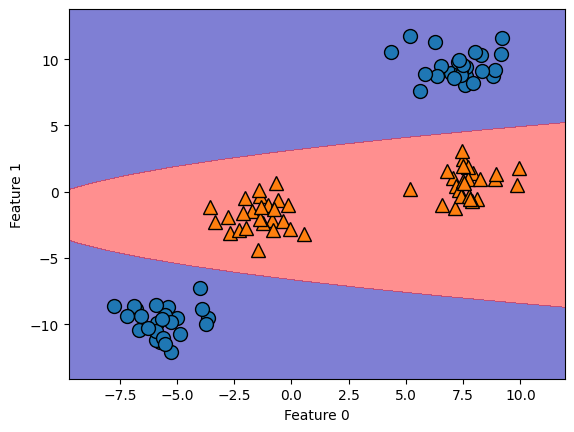

In [223]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

#### 理解SVM

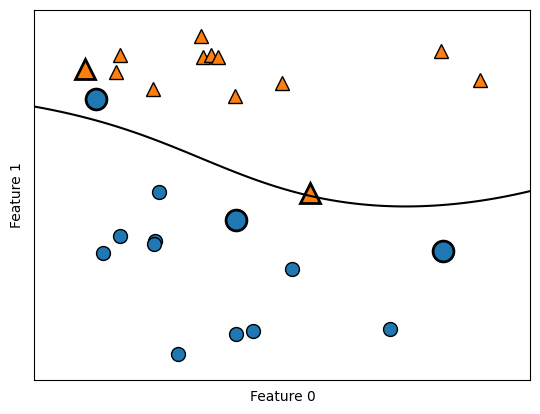

In [238]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

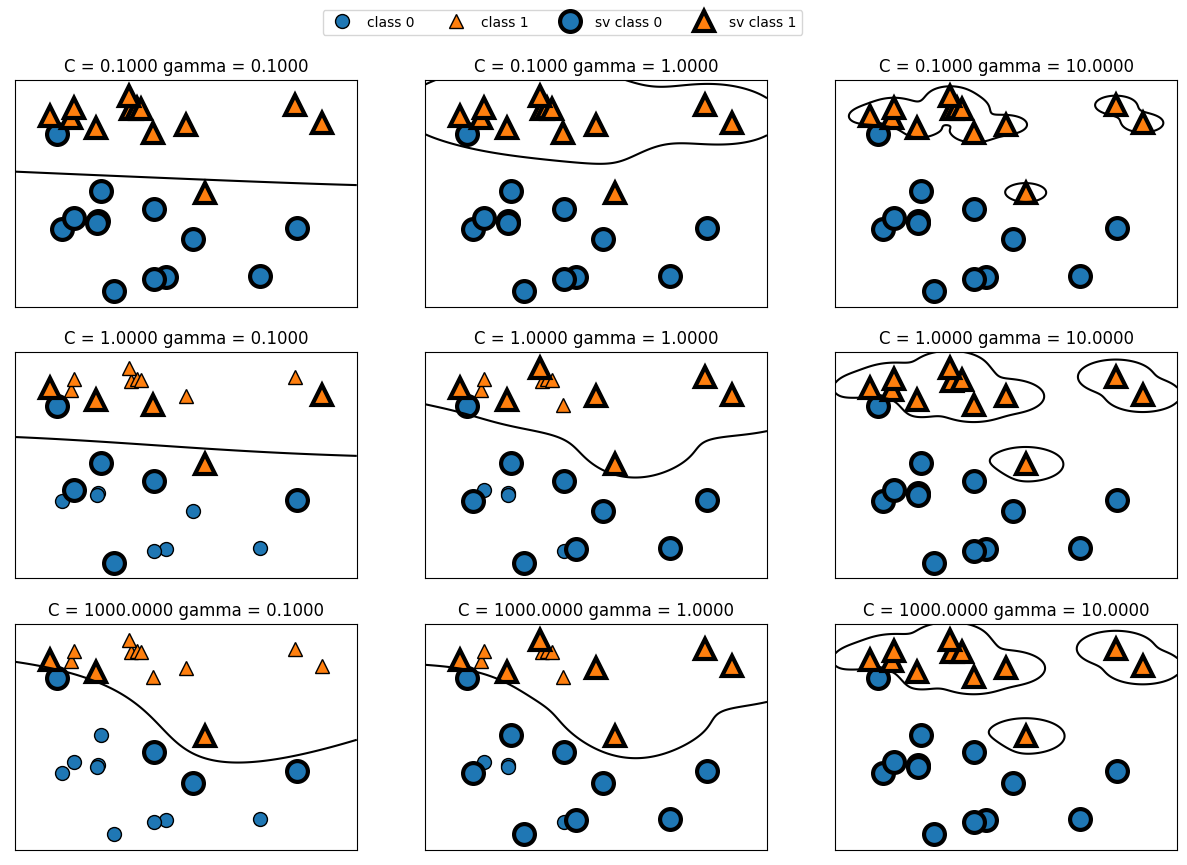

In [244]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'],
                  ncol=4, loc=(.9, 1.2))
plt.show()

In [248]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print('Accuracy on training set: {:.2f}'.format(svc.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


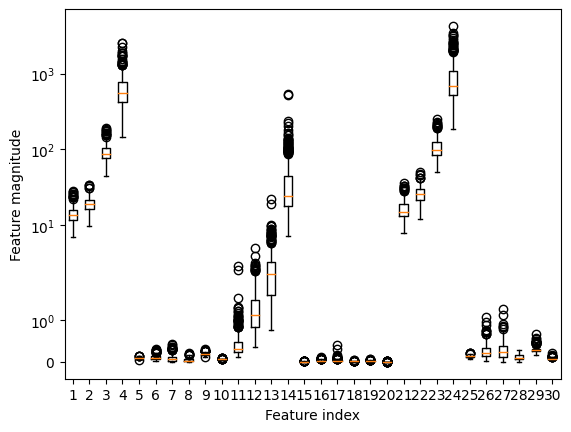

In [256]:
plt.boxplot(X_train)
plt.yscale('symlog')
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.show()

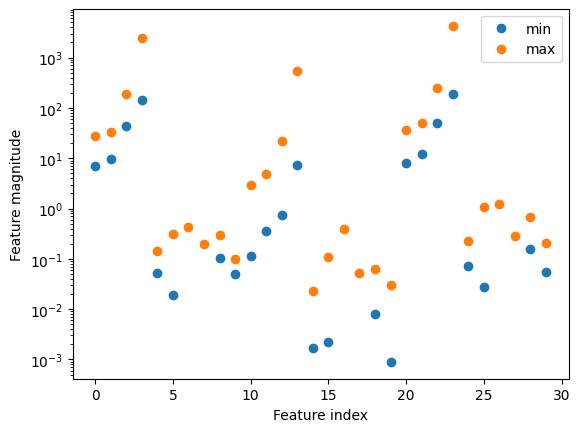

In [267]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), 'o', label='max')
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.legend()
plt.yscale('log')
# 没有的点意味着值为0
plt.show()

#### X_train.min(axis=0)

In [276]:
min_on_training = X_train.min(axis=0)
# 找到每个特征的数据范围
range_on_training = (X_train - min_on_training).max(axis=0)
# max_on_training = X_train.max(axis=0)
# range_on_training = max_on_training - min_on_training

X_train_scaled = (X_train - min_on_training) / range_on_training
print('Minimum for each feature \n', X_train_scaled.min(axis=0))
print('Maximum for each feature \n', X_train_scaled.max(axis=0))

Minimum for each feature 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [281]:
# 对测试集的特征做相同的变换
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [282]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print('Accuracy on training set: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


### 神经网络（深度学习）

#### 神经网络模型

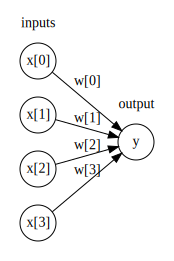

In [283]:
display(mglearn.plots.plot_logistic_regression_graph())

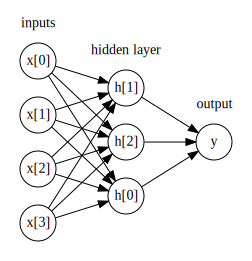

In [284]:
display(mglearn.plots.plot_single_hidden_layer_graph())

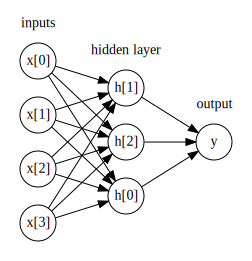

In [285]:
mglearn.plots.plot_single_hidden_layer_graph()